In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_df = pd.read_csv("iris.csv")

In [4]:
data_df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
data_df.shape

(150, 6)

In [6]:
data_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [48]:
data_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,150,NaN,NaN,NaN,75.5,43.4454,1,38.25,75.5,112.75,150
SepalLengthCm,150,NaN,NaN,NaN,5.84333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150,NaN,NaN,NaN,3.054,0.433594,2,2.8,3,3.3,4.4
PetalLengthCm,150,NaN,NaN,NaN,3.75867,1.76442,1,1.6,4.35,5.1,6.9
PetalWidthCm,150,NaN,NaN,NaN,1.19867,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-versicolor,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Clus_kmeans,150,NaN,NaN,NaN,0.973333,0.818795,0,0,1,2,2
sil_width,150,NaN,NaN,NaN,0.458401,0.189651,-0.0372014,0.361138,0.472706,0.587152,0.729737


In [10]:
data_df.duplicated().sum()

0

In [21]:
iris_df = data_df.drop(['Id','Species'], axis=1)
iris_type = data_df['Species'].copy()

In [22]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
X = StandardScaler()

In [25]:
scaled_df = X.fit_transform(iris_df)

In [26]:
scaled_df

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [27]:
k_means = KMeans(n_clusters = 2)

In [28]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [29]:
k_means.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
k_means.inertia_

223.73200573676343

In [31]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

140.96837895511072

In [32]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

114.61550694959811

In [33]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

600.0000000000003

In [34]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

91.12763977985172

In [35]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

81.8990104366758

In [36]:
wss =[] 

In [37]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [38]:
wss

[600.0000000000003,
 223.73200573676343,
 141.15417813388655,
 114.60278879607732,
 91.24867154739648,
 80.24972235577128,
 71.7916034109442,
 64.69136142506372,
 54.64380438517038,
 47.72525702404705]

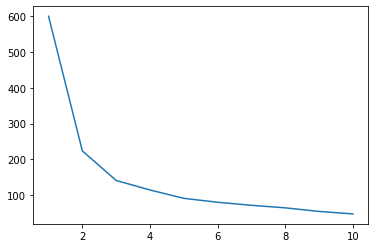

In [39]:
plt.plot(range(1,11), wss)

In [40]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [41]:
data_df["Clus_kmeans"] = labels
data_df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clus_kmeans
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [42]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [43]:
silhouette_score(scaled_df,labels)

0.45840087099074767

In [44]:
sil_width = silhouette_samples(scaled_df,labels)

In [45]:
data_df["sil_width"] = sil_width
data_df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clus_kmeans,sil_width
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,0.729737
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,0.573558
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,0.679825
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,0.623991
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,0.721907


In [46]:
silhouette_samples(scaled_df,labels).min()

-0.037201383259580466

In [47]:
data_df.to_csv('iris_clustered1.csv')